<a href="https://colab.research.google.com/github/lmfandre/Desafio_Clustering/blob/main/RID164252_Desafio07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mp

In [2]:
df = pd.read_csv("data.csv", encoding="ISO-8859-1")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Description e CustomerID contêm dados nulos

In [4]:
df.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


Temos 135.080 dados faltantes de clientes. São muitos dados, mas devem ser dropados para calcular o RFM

In [5]:
df = df.dropna(subset=['CustomerID'])

In [6]:
df.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [7]:
df.duplicated().sum()

np.int64(5225)

In [8]:
df = df.drop_duplicates()

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


Valores negativos em Quantity e UnitPrice não fazem sentido

In [11]:
menorq0 = df.query("Quantity <= 0 or UnitPrice <= 0")
menorq0

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [12]:
df = df.query("Quantity > 0 and UnitPrice > 0").copy()
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


<Axes: >

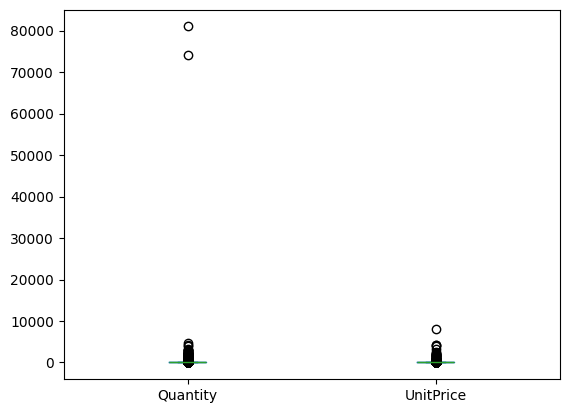

In [13]:
df[["Quantity", "UnitPrice"]].plot.box()

Existem dois valores outliers muito gritantes em Quantity, pode ser interessante ignorá-los na nossa análise


In [14]:
df.query("Quantity > 10000")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346.0,United Kingdom
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/2011 9:15,2.08,16446.0,United Kingdom


<Axes: >

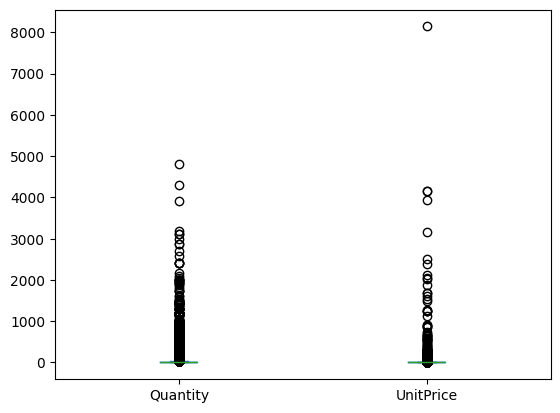

In [15]:
df.query("Quantity < 10000")[["Quantity", "UnitPrice"]].plot.box()

In [16]:
df.query("UnitPrice > 8000")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
173382,551697,POST,POSTAGE,1,5/3/2011 13:46,8142.75,16029.0,United Kingdom


Também vamos eliminar este outlier

In [17]:
df = df.query("Quantity < 10000 & UnitPrice < 8000").copy()

In [18]:
df["TotalPrice"] = df.Quantity * df.UnitPrice
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60


In [19]:
df[["Description", "Country"]].nunique()

,0
Description,3876
Country,37


In [20]:
df["InvoiceDate"] = pd.to_datetime(df.InvoiceDate, format = "%m/%d/%Y %H:%M")

In [21]:
df["CustomerID"] = df["CustomerID"].astype(int)
df["Country"] = df["Country"].astype("category")

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392689 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392689 non-null  object        
 1   StockCode    392689 non-null  object        
 2   Description  392689 non-null  object        
 3   Quantity     392689 non-null  int64         
 4   InvoiceDate  392689 non-null  datetime64[ns]
 5   UnitPrice    392689 non-null  float64       
 6   CustomerID   392689 non-null  int64         
 7   Country      392689 non-null  category      
 8   TotalPrice   392689 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 27.3+ MB


In [23]:
# **Agrupar por Cliente e Pedido (InvoiceNo)**
df_pedidos = df.groupby(["CustomerID", "InvoiceNo"]).agg(
    InvoiceDate=("InvoiceDate", "max"),  # Pega a data do pedido
    TotalOrderPrice=("TotalPrice", "sum")  # Soma os valores de cada pedido
).reset_index()

# **Calcular a última compra disponível**
ultima_compra = df_pedidos["InvoiceDate"].max()

# **Agrupar por Cliente e Calcular RFM**
rfm = df_pedidos.groupby("CustomerID").agg(
    Recency=("InvoiceDate", lambda x: (ultima_compra - x.max()).days),  # R
    Frequency=("InvoiceNo", "count"),  # F
    Monetary=("TotalOrderPrice", "mean")  # M (ticket médio)
).reset_index()

# **Visualizar o resultado**
print("Tabela RFM Calculada:")
print(rfm)

Tabela RFM Calculada:
      CustomerID  Recency  Frequency     Monetary
0          12347        1          7   615.714286
1          12348       74          4   449.310000
2          12349       18          1  1757.550000
3          12350      309          1   334.400000
4          12352       35          8   313.255000
...          ...      ...        ...          ...
4332       18280      277          1   180.600000
4333       18281      180          1    80.820000
4334       18282        7          2    89.025000
4335       18283        3         16   127.845625
4336       18287       42          3   612.426667

[4337 rows x 4 columns]


<Axes: >

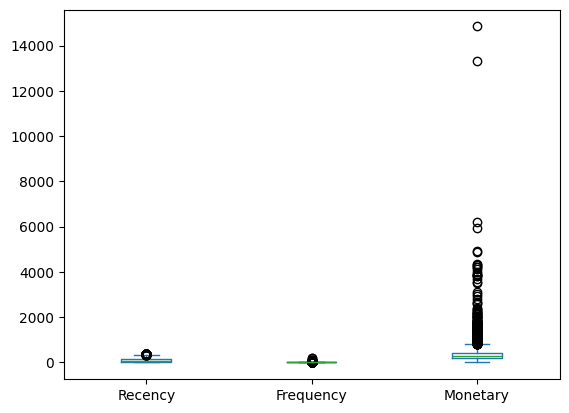

In [24]:
rfm[["Recency", "Frequency", "Monetary"]].plot.box()

Ainda temos 2 grandes outliers em Monetary, vamos analisar os dois casos mais de perto para ver se faz sentido ignorá-los

In [25]:
rfm.query("Monetary > 8000")

,CustomerID,Recency,Frequency,Monetary
2010,15098,181,3,13305.500000
2501,15749,234,3,14844.766667


In [26]:
df.query("CustomerID == 15098 or CustomerID == 15749")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
52709,540815,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1930,2011-01-11 12:55:00,2.55,15749,United Kingdom,4921.5
52710,540815,21175,GIN + TONIC DIET METAL SIGN,2000,2011-01-11 12:55:00,1.85,15749,United Kingdom,3700.0
52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-01-11 12:55:00,2.10,15749,United Kingdom,6539.4
52771,540818,47556B,TEA TIME TEA TOWELS,1300,2011-01-11 12:57:00,2.55,15749,United Kingdom,3315.0
52772,540818,48185,DOORMAT FAIRY CAKE,670,2011-01-11 12:57:00,6.75,15749,United Kingdom,4522.5
160542,550461,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1930,2011-04-18 13:20:00,2.40,15749,United Kingdom,4632.0
160543,550461,47556B,TEA TIME TEA TOWELS,1300,2011-04-18 13:20:00,2.10,15749,United Kingdom,2730.0
160544,550461,48185,DOORMAT FAIRY CAKE,670,2011-04-18 13:20:00,6.35,15749,United Kingdom,4254.5
160545,550461,21175,GIN + TONIC DIET METAL SIGN,2000,2011-04-18 13:20:00,1.69,15749,United Kingdom,3380.0
160546,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-04-18 13:20:00,2.10,15749,United Kingdom,6539.4




---


O cliente 15749 não parece levantar nenhuma suspeita, deve ser um consumidor forte mesmo. O cliente 15098 parece ter sofrido um erro ou confusão de dados, veja que ele compra 60 unidades do item PICNIC BASKET WICKER SMALL, depois compra 60 unidades do item PICNIC BASKET WICKER 60 PIECES, o qual já inclui a quantidade na descrição. Vamos eliminar somente este cliente.

In [27]:
rfm = rfm[rfm["CustomerID"] != 15098]
rfm

,CustomerID,Recency,Frequency,Monetary
0,12347,1,7,615.714286
1,12348,74,4,449.310000
2,12349,18,1,1757.550000
3,12350,309,1,334.400000
4,12352,35,8,313.255000
...,...,...,...,...
4332,18280,277,1,180.600000
4333,18281,180,1,80.820000
4334,18282,7,2,89.025000
4335,18283,3,16,127.845625


<Axes: >

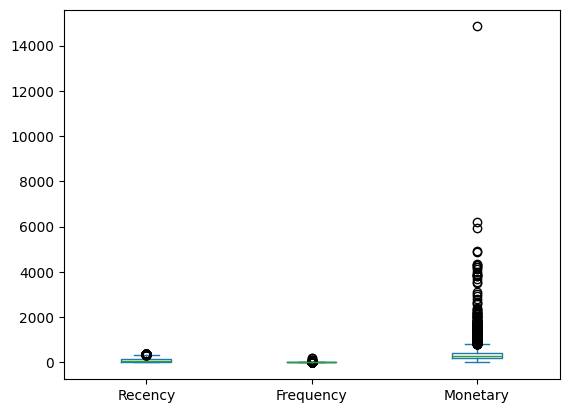

In [28]:
rfm[["Recency", "Frequency", "Monetary"]].plot.box()

In [29]:
rfm.describe()

,CustomerID,Recency,Frequency,Monetary
count,4336.000000,4336.000000,4336.000000,4336.000000
mean,15301.136070,91.509225,4.272601,377.517092
std,1721.618065,99.970323,7.697927,457.112734
min,12347.000000,0.000000,1.000000,2.900000
25%,13813.750000,17.000000,1.000000,177.793929
50%,15300.500000,50.000000,2.000000,291.616500
75%,16779.250000,141.000000,5.000000,427.946667
max,18287.000000,373.000000,209.000000,14844.766667




---

Mesmo após remover os outliers mais notáveis, ainda podemos perceber uma diferença muito grande entre a maior parte dos dados (75%) e o valor máximo.
Para tentar amenizar isso, vamos usar um método de clip


In [30]:
rfm_clip = rfm.apply(lambda x: x.clip(upper = x.quantile(.95)))
rfm_clip.describe()

,CustomerID,Recency,Frequency,Monetary
count,4336.000000,4336.000000,4336.000000,4336.000000
mean,15293.407115,89.750231,3.608164,338.679768
std,1709.053321,95.564917,3.358999,220.222624
min,12347.000000,0.000000,1.000000,2.900000
25%,13813.750000,17.000000,1.000000,177.793929
50%,15300.500000,50.000000,2.000000,291.616500
75%,16779.250000,141.000000,5.000000,427.946667
max,17984.250000,311.000000,13.000000,930.210000


In [31]:
from sklearn.preprocessing import scale
rfm_clip_scaled = rfm_clip.apply(scale)

In [32]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN, MeanShift, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from yellowbrick.cluster import kelbow_visualizer

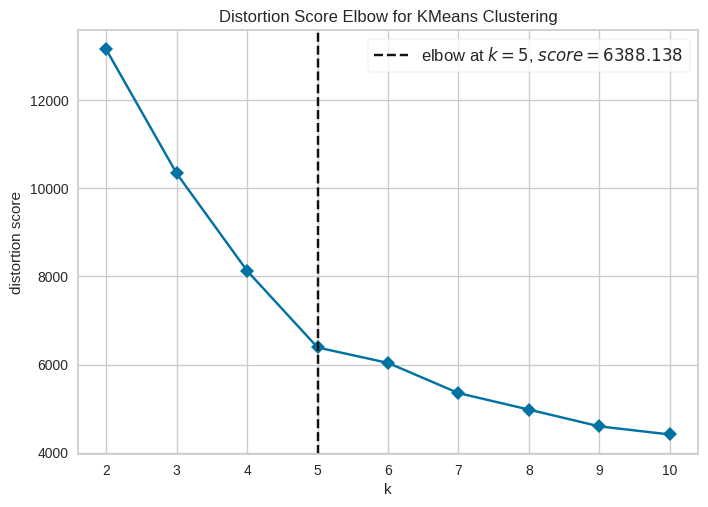

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=10), timings=False)

In [33]:
kelbow_visualizer(KMeans(), rfm_clip_scaled, k = 10, timings = False)

In [34]:
# Create list of dictionaries

cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score
cluster_metrics_results = []
X = rfm_clip_scaled.copy()

for k in range(2,11):
  model = KMeans(n_clusters=k, random_state=0)
  labels = model.fit_predict(X)
  cluster_results_dict = {'k': k}
  cluster_results_dict['inertia'] = model.inertia_
  for metric in cluster_metrics:
    cluster_results_dict[metric.__name__] = metric(X, labels)
  cluster_metrics_results.append(cluster_results_dict)

pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient()

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,13152.519403,0.262931,1.404965,1381.172817
3,10550.652548,0.272288,1.387891,1394.968400
4,8076.659863,0.304044,1.156471,1656.877891
5,6388.224087,0.307633,1.014311,1856.920755
6,5740.693018,0.299273,1.064246,1750.402658
7,5287.357262,0.292672,1.148254,1645.222088
8,5208.054542,0.240633,1.291932,1440.753582
9,4604.562724,0.245904,1.306723,1496.438109
10,4327.975704,0.250896,1.231067,1445.573995


In [35]:
kmeans = KMeans(4)
kmeans_labels = kmeans.fit_predict(rfm_clip_scaled)



---

Vamos usar K = 4, mesmo o kelbow tendo sugerido 5, pois ao final, seriam gerados dois grupos muito parecidos

In [36]:
import plotly.express as px
px.scatter_3d(rfm_clip, x = "Recency", y = "Frequency", z = "Monetary", color = kmeans_labels.astype(str))

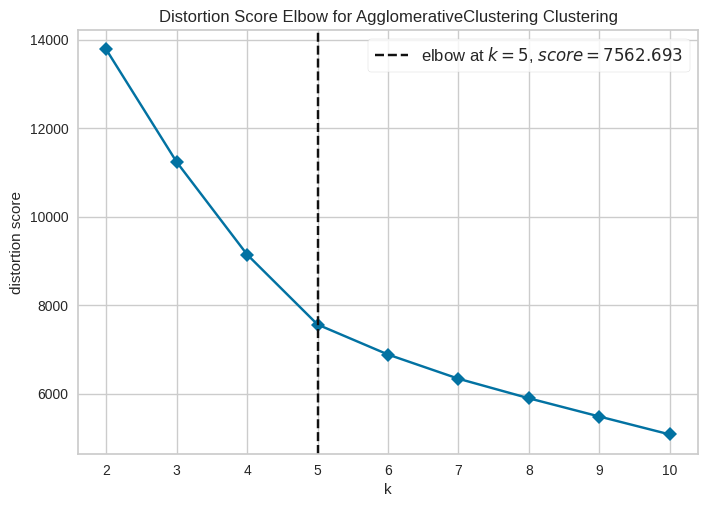

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=AgglomerativeClustering(n_clusters=10),
                 timings=False)

In [37]:
kelbow_visualizer(AgglomerativeClustering(), rfm_clip_scaled, k=10, timings=False)

In [38]:
# Create list of dictionaries

cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score
cluster_metrics_results = []
X = rfm_clip_scaled.copy()

for k in range(2,11):
  model = AgglomerativeClustering(n_clusters=k)
  labels = model.fit_predict(X)
  cluster_results_dict = {'k': k}
  for metric in cluster_metrics:
    cluster_results_dict[metric.__name__] = metric(X, labels)
  cluster_metrics_results.append(cluster_results_dict)

pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient()

,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,
2,0.231187,1.368772,1122.960914
3,0.233431,1.360969,1178.500868
4,0.257161,1.299549,1295.056188
5,0.236008,1.178617,1400.388732
6,0.226753,1.193420,1315.380913
7,0.224824,1.210102,1252.611857
8,0.222253,1.214506,1200.061065
9,0.231593,1.174342,1169.234264
10,0.225044,1.230611,1160.304859


In [39]:
hclust = AgglomerativeClustering(n_clusters=4)
hclust_labels = hclust.fit_predict(rfm_clip_scaled)

In [40]:
px.scatter_3d(rfm_clip, x = "Recency", y = "Frequency", z = "Monetary", color = hclust_labels.astype(str))

In [41]:
# Select best model by covariance type and K (Practical Statistics for Data Scientists)
results = []
k_range = range(1,9)
covariance_types = ['full', 'tied', 'diag', 'spherical']
X = rfm_clip_scaled.copy()

for n_components in k_range:
  for covariance_type in covariance_types:
    mclust = GaussianMixture(n_components=n_components, n_init=10, warm_start=True, covariance_type=covariance_type)
    mclust.fit(X)
    results.append({
      'bic': mclust.bic(X),
      'n_components': n_components,
      'covariance_type': covariance_type,
    })

results = pd.DataFrame(results)
results.sort_values('bic').head()

,bic,n_components,covariance_type
24,15684.472810,7,full
30,16831.042291,8,diag
28,16883.447017,8,full
26,16972.418948,7,diag
22,22069.884417,6,diag


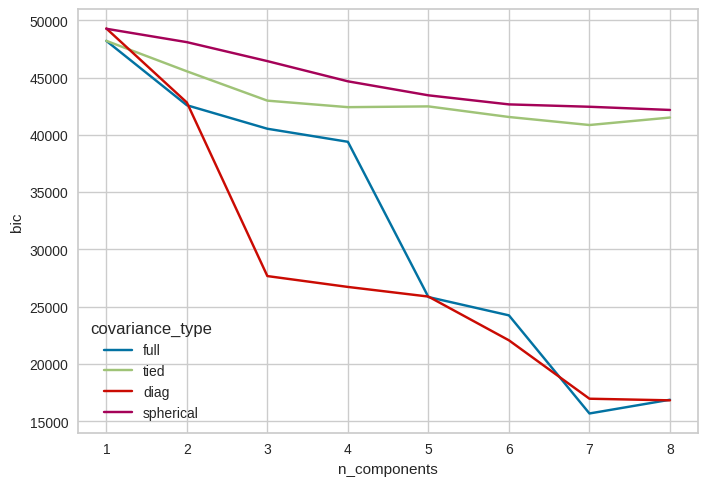

In [42]:
sns.lineplot(data = results, x = 'n_components', y='bic', hue='covariance_type');

In [43]:
mclust = GaussianMixture(n_components=5, covariance_type='full', n_init=10)
mclust_labels = mclust.fit_predict(rfm_clip_scaled)

In [44]:
px.scatter_3d(rfm_clip, x='Recency', y='Frequency', z='Monetary', color=mclust_labels.astype(str))

In [45]:
import matplotlib.pyplot as plt

In [46]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=rfm_clip_scaled.columns)

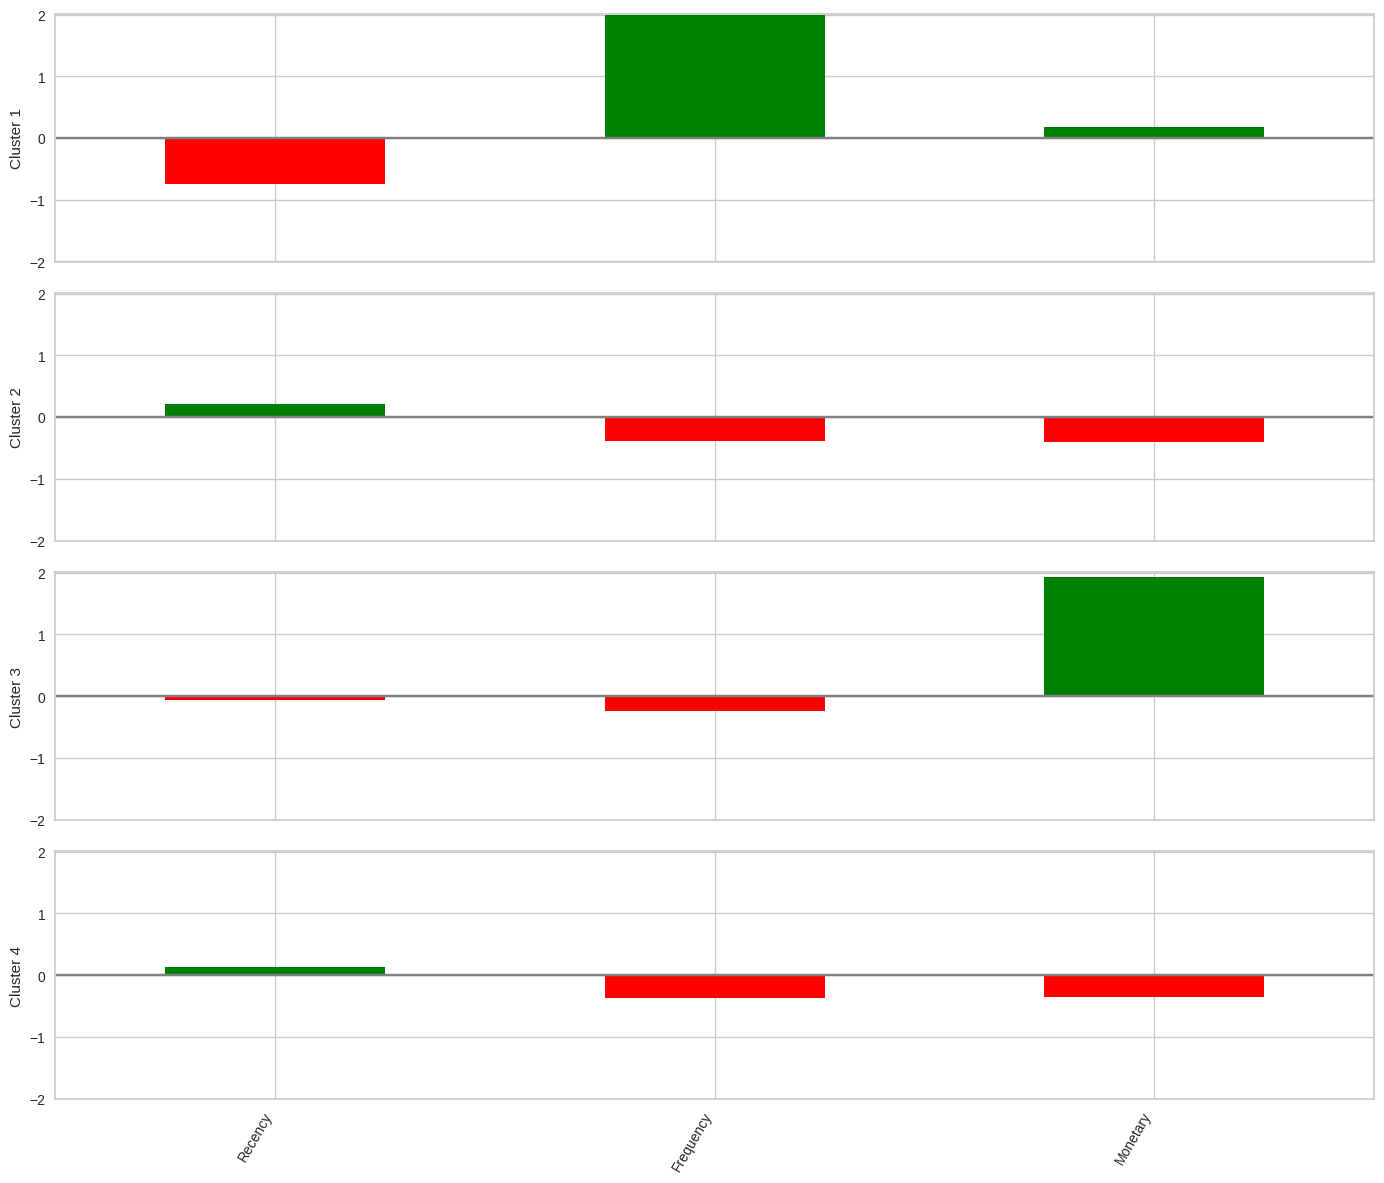

In [47]:
# Adaptado do livro "Practical Statistics for Data Scientists"

# Remova 'CustomerID' de 'centers' antes de plotar
centers = centers.drop(columns=['CustomerID'])

# Encontrar o maior valor absoluto em todos os clusters
maxPC_global = 1.01 * centers.abs().max().max()  # O maior valor absoluto no DataFrame

fig,axes = plt.subplots(nrows=4, figsize=(14,12), sharex=True)

for i,ax in enumerate(axes):
  center = centers.loc[i,:]
  maxPC = 1.01 * center.abs().max()
  colors = ['green' if l > 0 else 'red' for l in center]
  center.plot.bar(ax=ax, color=colors)
  ax.set_ylabel(f'Cluster {i+1}')
  # Aplicar o mesmo limite para todos os eixos Y
  ax.set_ylim(-maxPC_global, maxPC_global)
  ax.axhline(color='gray')
  ax.xaxis.set_ticks_position('none')

plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

In [48]:
(
  rfm_clip.assign(cluster=kmeans_labels)
  .groupby('cluster')
  .mean()
  .transpose()
  .style.background_gradient(cmap='YlOrRd', axis=1)
)

cluster,0,1,2,3
CustomerID,15399.760837,16803.752886,14519.715315,13841.987722
Recency,17.866966,109.103281,83.385586,103.233970
Frequency,10.285501,2.294654,2.792793,2.344475
Monetary,377.040304,249.126179,764.769883,260.413734




---
Identificamos 4 grupos de clientes bem distintos:

1.   Clientes deste cluster são os mais recentes e frequentes. Eles compram regularmente e têm um gasto médio razoável. Estes clientes podem ser considerados fiéis, que fazem compras repetidas e têm um bom histórico de gastos.
2.   Este grupo de clientes fez compras há algum tempo (cerca de 1 mês e meio atrás), mas tem uma frequência mais baixa de compras. O gasto médio também é um pouco menor, mas ainda substancial. Esses clientes podem estar em um estágio intermediário: não são recentes, mas também não estão completamente inativos.
3. Este grupo de clientes fez compras ainda mais distantes, com uma frequência também moderada. No entanto, eles se destacam por gastar mais por compra, o que pode indicar que são clientes menos frequentes, mas que compram em maiores quantidades. Eles são um grupo importante devido ao seu alto valor monetário.
4. Este cluster representa clientes inativos há muito tempo (mais de 8 meses). A frequência de compras é muito baixa, e o gasto também é relativamente baixo. Esses clientes podem ser considerados como clientes em risco de abandono, churned, ou clientes esporádicos, que não geraram compras recentes e provavelmente não estão muito envolvidos com a marca.

Com isso, pode ser elaborada uma estratégia baseada em cada grupo individualmente, ou conforme a empresa desejar. Por exemplo, os grupos 2 e 3 representam clientes em risco, que não compram com tanta frequência quanto o primeiro grupo. Assim, campanhas de reativação, como ofertas especiais ou lembretes de produtos, podem ser direcionadas para tentar trazer esses clientes de volta.
Ainda, o grupo 2 tem um alto gasto médio, o que indica que, mesmo com baixa frequência, eles podem ser clientes importantes para a marca. Estratégias de up-selling ou cross-selling podem ser eficazes, oferecendo produtos complementares de alto valor.
